In [8]:
import sympy
import numpy as np

[[13.0112 -3.3457]
 [-3.3457  3.7175]]
Matrix([[1, 0], [0, 1], [0.5*(-52.0448*x + 13.3828*y)*exp(-26.0224*x**2 + 13.3828*x*y - 7.435*y**2), 0.5*(13.3828*x - 14.87*y)*exp(-26.0224*x**2 + 13.3828*x*y - 7.435*y**2)]])
(-55.279225*(0.899986550100874*x - y)**2 - Math.exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2))*Math.exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2)/(37433.1730781839*(0.899986550100874*x - y)**2*(x - 0.25714000245942*y)**2 - (55.279225*(0.899986550100874*x - y)**2 + Math.exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2))*(677.16530176*(x - 0.25714000245942*y)**2 + Math.exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2)))
-0.25*(13.3828*x - 14.87*y)*(52.0448*x - 13.3828*y)*Math.exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2)/(37433.1730781839*(0.899986550100874*x - y)**2*(x - 0.25714000245942*y)**2 - (55.279225*(0.899986550100874*x - y)**2 + Math.exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2))*(677.16530176*(x - 0.25714000245942*y)**2 + Math.exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2)))
(-677.1

Matrix([
[(-55.279225*(0.899986550100874*x - y)**2 - exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2))*exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2)/(37433.1730781839*(0.899986550100874*x - y)**2*(x - 0.25714000245942*y)**2 - (55.279225*(0.899986550100874*x - y)**2 + exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2))*(677.16530176*(x - 0.25714000245942*y)**2 + exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2))),                                        -0.25*(13.3828*x - 14.87*y)*(52.0448*x - 13.3828*y)*exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2)/(37433.1730781839*(0.899986550100874*x - y)**2*(x - 0.25714000245942*y)**2 - (55.279225*(0.899986550100874*x - y)**2 + exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2))*(677.16530176*(x - 0.25714000245942*y)**2 + exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2)))],
[                                     -0.25*(13.3828*x - 14.87*y)*(52.0448*x - 13.3828*y)*exp(52.0448*x**2 - 26.7656*x*y + 14.87*y**2)/(37433.1730781839*(0.899986550100874*x - y)**2*(x - 0.25714000245942*y

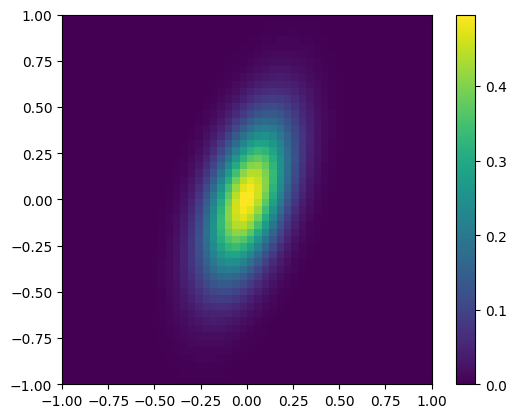

In [37]:
import sympy.vector
import matplotlib.pyplot as plt


mat = np.linalg.inv(np.array([[0.1, 0.09], [0.09, 0.35]])).round(4)

print(mat)

x, y = sympy.symbols("x y")

expr = sympy.Matrix(
    (
        x,
        y,
        0.5
        * sympy.exp(-1 * (mat[0, 0] * x**2 + 2 * mat[0, 1] * x * y + mat[1, 1] * y**2))
        ** 2,
    )
)

# expr = sympy.Matrix((x, y, sympy.exp(-((-3 * x + y) ** 2))))

# # expr = sympy.Matrix((x + y, y, 0.0000001 * y))
# expr = sympy.Matrix((x, y, 0.5 * x**2 + 0.25 * y**2))
# expr = sympy.Matrix((x, y, 0.5 * x**2 + 0.25 * y**2))

jacobian = expr.jacobian((x, y))
print(jacobian)
tensor = jacobian.T @ jacobian
tensor.simplify()
tensor_inv = sympy.Matrix(
    [[tensor[1, 1], -tensor[0, 1]], [-tensor[1, 0], tensor[0, 0]]]
) / (tensor[0, 0] * tensor[1, 1] - tensor[0, 1] * tensor[1, 0])
# convert all entries in this 2x2 matrix to javascript evaluable strings, so exp -> Math.exp etc

tensor_inv.simplify()


print(str(tensor_inv[0, 0].evalf()).replace("exp", "Math.exp"))
print(str(tensor_inv[0, 1].evalf()).replace("exp", "Math.exp"))
print(str(tensor_inv[1, 1].evalf()).replace("exp", "Math.exp"))


display(tensor_inv)


# show heightmap of expr function
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)

# function to evaluate the expression at a given x, y
expression = sympy.lambdify((x, y), expr, "numpy")

Z = expression(X, Y)[2, :].squeeze()
plt.colorbar(plt.imshow(Z, extent=(-1, 1, -1, 1), origin="lower"))